# Telco Churn Report

# Goal
- Discover some potential drivers for churn
- Delvelope machine learning models for churn prediction
- Reccomend some key factors to reduce future churn

# Imports

In [1]:
from wrangle import *
from functions import *

# Visualize your success!
import seaborn as sns
import matplotlib.pyplot as plt

#Stats
from scipy import stats

# sklearn for modeling:
from sklearn.tree import DecisionTreeClassifier,\
export_text, \
plot_tree
from sklearn.metrics import accuracy_score, \
classification_report, \
confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Acquire 

- Data acquired from SQL server
- 7043 rows and 24 columns before cleaning
- Each row represents a customer 

# Prepare

- Removed columns that weren't useful
- Changed data types of columns that were unfriendly for machine learning (ie: removed characters such as dollar signs and commas)
- Added encoded columns for all categorical columns 
- Split data into train, validate, and test (approx. 56/24/20) stratifying on churn

#                                   Data Dictionary


| Feature | Values | Description                                  |
|:-------------|:-----------|:----------------------------------------------|
| Gender    | (M,F)       | The customer's gender.        |
| Senior Citizen |    (Yes, No)    | Boolean of senior citizenship status |
| Partner | (Yes, No)   | Customer's partnership status                |
| Dependents    | (Yes,  No)       | Status of customer's dependents        |
| Tenure |   Integer    | Number of months customer has been with Telco |
| Phone service | (Yes, No)   | Customer's Phone service status            |
| Multiple Lines    | (Yes, No, No phone service)       | Does customer have multiple phone lines.        |
| Online Security |    (Yes, No, No internet service)  | Does Customer have online security services                        | 
| Online Backup Service | (Yes, No, No internet service |Does customer have Online backup services|
| Device Protection    | (Yes, No, No internet service) | Does the customer have a device protection service |
| Tech Support |    (Yes, No, No internet service)    | Does customer have tech support service|
| Streaming TV| (Yes, No, No internet service)   | Does the customer stream Tv|
| Streaming Movies| (Yes, No, No internet service)   | Does the customer stream movies|
| Paperless Billing| (Yes, No)       | Does the customer use paperless billing|
| Monthly Charges|    Float number   | The customers monthly bill|
| Total Charges |  Float number   | The customers total charges to date     |
| Churn   | (Yes, No)       | Churn status of customer |
| Contract Type|   (month_to_month, one_year, two_yer)   | The customer's contract type |
| Internet service type | (Fiber, DSL, None)   | What internet service type customer has |
| Paymet Type    | (Electronic check, Mailed check, Credit card (automatic), Bank transfer (automatic)   | How the customer pays their bill |


In [2]:
# Accuring, cleaning and preping the data
df = prep_telco()

# Splitting data into train, validate, and test
train, validate, test = train_validate_test(df, 'churn')

## A look at the data

In [3]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
6633,9430-FRQOC,Female,0,No,Yes,4,Yes,Yes,No,No,...,1,0,0,0,1,0,0,0,0,1
1948,2826-DXLQO,Male,1,Yes,No,7,No,No phone service,Yes,No,...,1,0,0,1,0,0,1,0,0,0
1140,1679-JRFBR,Female,0,Yes,Yes,70,Yes,Yes,Yes,Yes,...,0,1,0,0,1,0,0,1,0,0
2729,3884-UEBXB,Female,0,Yes,Yes,67,No,No phone service,Yes,Yes,...,0,0,1,1,0,0,1,0,0,0
5507,7754-IXRMC,Female,0,No,No,1,Yes,No,No,No,...,1,0,0,1,0,0,0,0,0,1


## A summary of the data

In [4]:
train.describe()

,senior_citizen,tenure,monthly_charges,total_charges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
count,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,...,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000
mean,0.161552,32.399949,64.955009,3276.538283,0.492265,0.507735,0.516865,0.483135,0.705047,0.294953,...,0.551864,0.204920,0.243216,0.332995,0.447375,0.219630,0.213036,0.222927,0.335278,0.228760
std,0.368086,24.609060,30.217911,7093.200088,0.500004,0.500004,0.499779,0.499779,0.456080,0.456080,...,0.497366,0.403694,0.429079,0.471345,0.497286,0.414048,0.409505,0.416262,0.472147,0.420088
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.250000,435.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.650000,1468.900000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,90.050000,4136.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,84050.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Explore

## How often does churn occur?

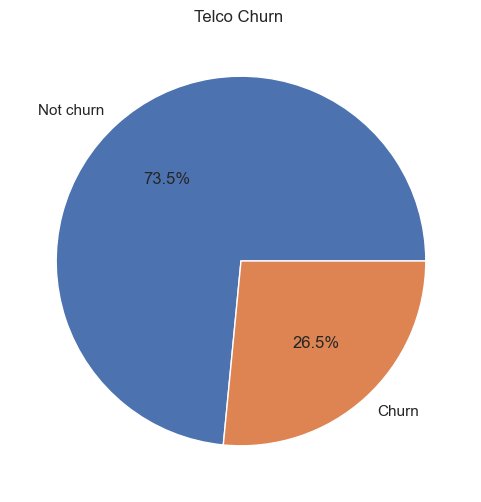

In [5]:
# Get pie chart churn
get_churn_pie()

- A little over 1/4 of the datat accounts for churn

# 1.)  Does contract type affect churn?

Univariate assessment of feature contract_type:


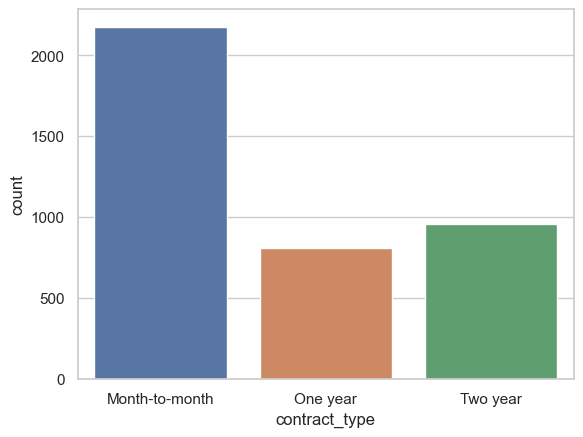

                contract_type  contract_type
Month-to-month           2176       0.551864
Two year                  959       0.243216
One year                  808       0.204920


In [6]:
# Get the univariant visualization for contract_type
get_driver('contract_type')

- Over half of the customer base have Month-to-month contracts

#### I will do a chisquared statistical test on the two categories. 
- I will use a confidence interval of 95%
- Leaving alpha as .05 

### H$_o$: contract type is not a driver for churn

### H$_a$: contract type is a driver for churn



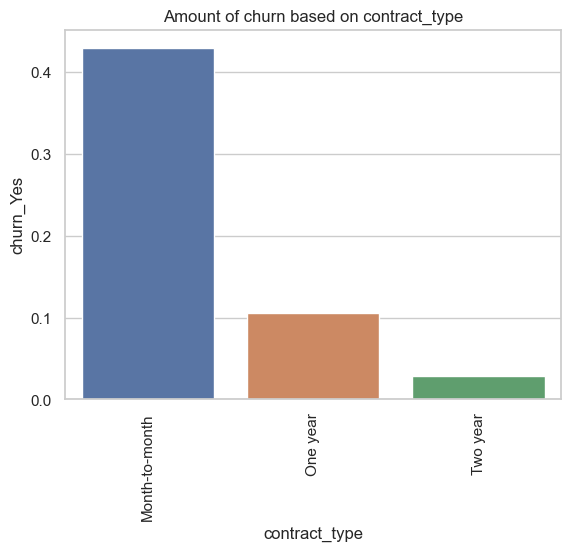

We can reject our null hypothesis: and say that contract type can be a driver because the p value: 4.923817535766266e-149 is less that alpha: 0.05


In [7]:
# Get the bivariant visualization for contract_type and run a chisquared test on the two categories
get_chisquared('contract_type')

- About half of the churn lives in month-to-month contract
- Since our null hypothesis is rejected we can use it in our modeling

## 2.) Are monthly charges a driver for churn?

### H$_o$: monthly charges are not a driver for churn

### H$_a$: monthly charges are a driver for churn

### Since our churn is categorical and monthly charges is continious I'm going to use a t-test to test my hypothesis. 
- I will use a confidence interval of 95%
- Leaving alpha as .05 

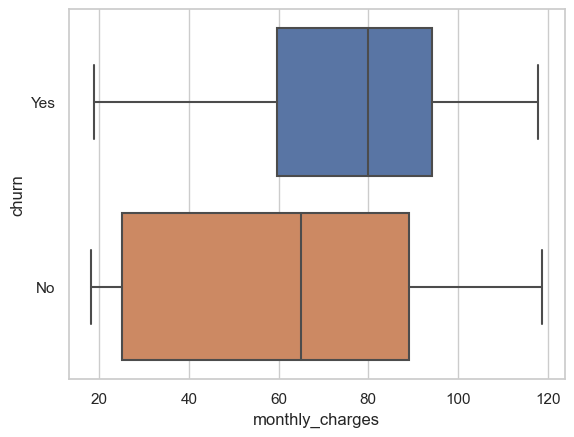

We can reject our null hypothesis: and say that being a monthly charges can be a driver because the p value: 4.877591649838506e-35 is less that alpha: 0.05


In [8]:
# Get monthly charges visual and run our stats test
get_monthly_charges()

#### Becasue the null hypothesis has been rejected I can use this as a driver for my model

# 3.) Does internet type drive churn?

#### I will do a chisquared statistical test on the two categorical test. 
- I will use a confidence interval of 95%
- Leaving alpha as .05 

### H$_o$: internet type is not a driver for churn

### H$_a$: internet type is a driver for churn

Univariate assessment of feature internet_service_type:


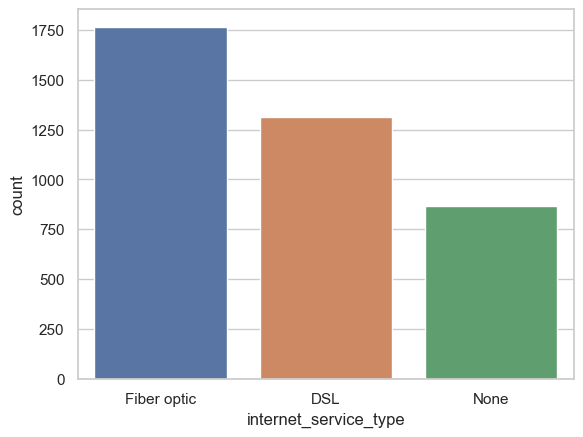

             internet_service_type  internet_service_type
Fiber optic                   1764               0.447375
DSL                           1313               0.332995
None                           866               0.219630


In [9]:
# get univarite visual and report
get_driver('internet_service_type')

#### Since internet service type has enough significant churn amount I'm gonna run a chisquared test on it. 
- I will use a confidence interval of 95%
- Leaving alpha as .05 

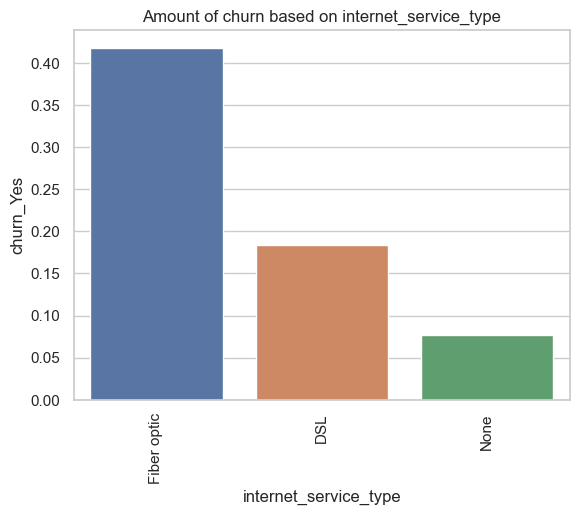

We can reject our null hypothesis: and say that contract type can be a driver because the p value: 4.20026357373882e-90 is less that alpha: 0.05


In [10]:
# get stats test and visual
get_chisquared('internet_service_type')

#### Becasue the null hypothesis has been rejected I can use this as a driver for my model

# Exploration Summary

- Churn amount for contract type is over double compared to the other contract types
- The majority of churn comes from the monthly payments living in the 60 - 90 dollar range
- Churn rate at roughly 26 percent 
- 44% of internet service type came from fiberoptic 

# Features I'm moving on to modeling with:
- contract type
- monthly charges
- internet service type


# Modeling 
- I will use accuracy and recall as my evaluation metric
- Non churns make up 74% of the data

- Since No churn is the majority I will use it as the baseline prediciton
- I will be running three different models with my drivers from exploration

# Decision Tree

In [11]:
# Get the decision tree model
get_decisionTree_model()

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      2897
           1       0.59      0.49      0.54      1046

    accuracy                           0.77      3943
   macro avg       0.71      0.68      0.69      3943
weighted avg       0.76      0.77      0.77      3943

Accuracy of Random Tree classifier on training set: 0.77
Accuracy of Random Tree classifier on validation set: 0.75


DecisionTreeClassifier(max_depth=5, random_state=706)

- Decision Tree accuracy on training pretty consistent and not much drop off on validation but the recall is pretty low

# Random Forest

In [12]:
# Get the random forest model and returns the best model from the forest
get_random_forest()

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      2897
           1       0.58      0.31      0.40      1046

    accuracy                           0.76      3943
   macro avg       0.69      0.61      0.62      3943
weighted avg       0.73      0.76      0.73      3943



,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,model_preds,difference,baseline_accuracy
2,1,4,0.768197,0.754583,"[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, ...",0.013614,0.73472


- accuracy and recall very slightly higher than the random tree

# Logistic Regression

In [13]:
# get the logistial regression model
get_logReg_model('train_val')

Accuracy of Logistic Regression classifier on training set: 0.76
Accuracy of Logistic Regression classifier on validation set: 0.76
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      2897
           1       0.54      0.63      0.58      1046

    accuracy                           0.76      3943
   macro avg       0.70      0.72      0.71      3943
weighted avg       0.77      0.76      0.77      3943



- Accuracy is one percent lower but much a better recall 

# Comparing Models
- All of the models preformed very similiarly on accuracy with the train and validation data sets
- Because the Ligistical Regression model preformed better with recall I'm choosing it to move on to the test data.

# Logistic Regression on Test

In [14]:
# Get results on test data
get_logReg_model('test')

Accuracy of logistic regression classifier on test set: 0.77


# Modeling Sumary 
- All models preformed very similiar to each other
- Only the Logistical Regresson had the best recall at 63%
- Model in test production did 3% better than basline prediction


# Conclusions

### Exploration
- churn consist of 26% of the data
- Contract type seem to be the highest driver
- Most churn came from monthly charges in the 60 - 90 dollar range
- The fiber optic internet service type had the highest volume of churn 

### Modeling 
- All models were able to predict higher than the baseline
- The logistical regression model had the best recall

# Reccomendations 
- Consider looking into contract type. At face value having month to month looks like a huge driver for churn but futher data on customer return-rate could tell a different story.
- Consider looking at monthly charges and determine if charge rate is competitive with the market

# Next Steps
- Fine tune the models to get beter preformance 
    - Do more in depth feature analsys and stats testing
- With other types of data to add to current like customer return rate could help to explain the churn from month to month contract type.